# San Fransisco Crime Classification - RAFAEL FILARDI

De 1934 a 1963, San Francisco fue tristemente célebre por albergar a algunos de los criminales más célebres del mundo en la ineludible isla de Alcatraz. Hoy, la ciudad es más conocida por su escena tecnológica que por su pasado criminal. Pero, con el aumento de la desigualdad económica y la escasez de vivienda, la delincuencia no escasea en la zona de la bahía. Este dataset ofrece casi 12 años de informes sobre delitos en todos los barrios de San Francisco.
Dada la hora y la ubicación, se debe predecir la categoría de delito que se ha producido. Para esto se dispone del siguiente dataset extraído de kaggle: San Francisco Crime Classification | Kaggle , https://www.kaggle.com/competitions/sf-crime/overview.

Los modelos que se realizaran en esta parte seran sobre el dataset completo, para el prototipado y diferentes pruebas de parametros se utilizo RapidMiner


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

archivo_csv = './train.csv/train.csv'
df = pd.read_csv(archivo_csv)

df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [2]:
null_values_per_atribbute = df.isnull().sum()
null_values_per_atribbute

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [3]:
duplicated_values = df.duplicated().sum()
duplicated_values

2323

In [4]:
df.drop_duplicates(inplace=True)
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [5]:
df['Dates'] = pd.to_datetime(df['Dates'])

df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.time

df['Hour'] = df['Hour']
df['isNight'] = (df['Hour'] >= pd.to_datetime('18:00:00').time()) | (df['Hour'] < pd.to_datetime('06:00:00').time())
df['Weekend'] = df['DayOfWeek'].isin(['Friday', 'Saturday', 'Sunday'])
df['Block'] = df['Address'].str.contains('BLOCK', case=False).astype(int)

df.drop('Dates', axis=1, inplace=True)
df

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23:33:00,True,False,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23:30:00,True,False,1
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23:30:00,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,00:15:00,True,False,0
878045,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,00:01:00,True,False,1
878046,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,00:01:00,True,False,0
878047,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,00:01:00,True,False,0


In [6]:
df.drop(['Descript', 'Resolution'], axis=1, inplace=True)
df

,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23:33:00,True,False,0
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23:30:00,True,False,1
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23:30:00,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,00:15:00,True,False,0
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,00:01:00,True,False,1
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,00:01:00,True,False,0
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,00:01:00,True,False,0


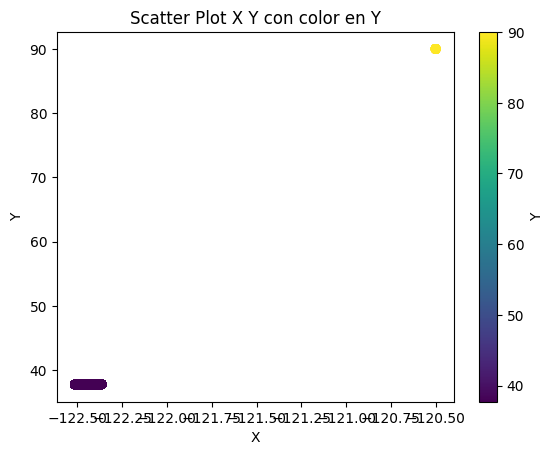

In [7]:
plt.scatter(df['X'], df['Y'], c=df['Y'], cmap='viridis', marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot X Y con color en Y')

plt.colorbar(label='Y')

plt.show()

In [8]:

el_polo_norte = df.loc[(df['X'] == -120.5) & (df['Y'] == 90)]

missinput_xy = len(el_polo_norte)

missinput_xy

67

In [9]:
result_year = df['Year'].apply(lambda x: x).value_counts()
result_year

Year
2013    75412
2014    74563
2003    73744
2004    73201
2012    71558
2005    70596
2008    69976
2006    69713
2009    68771
2007    67841
2011    66475
2010    66354
2015    27522
Name: count, dtype: int64

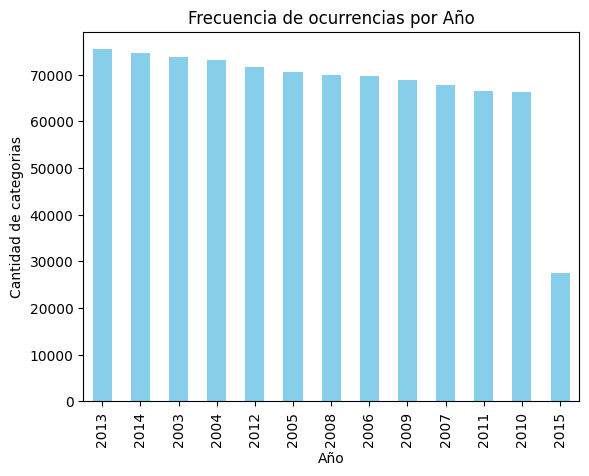

In [10]:
result_year.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de categorias')
plt.title('Frecuencia de ocurrencias por Año')
plt.show()

In [11]:
result_month = df['Month'].apply(lambda x: x).value_counts()
result_month

Month
10    80038
5     79467
4     77889
3     76130
1     73335
11    72748
9     71805
2     70666
6     70666
7     69785
8     68341
12    64856
Name: count, dtype: int64

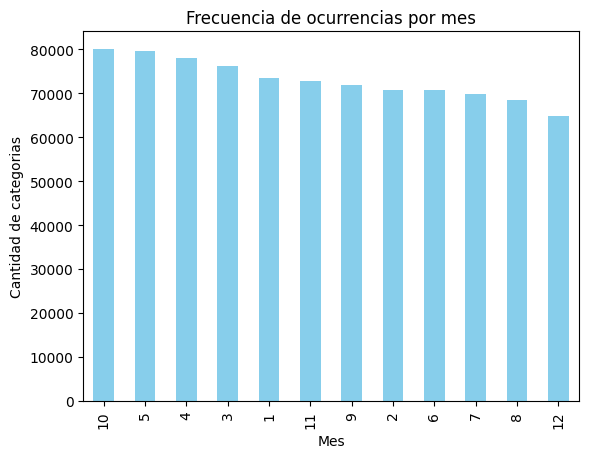

In [12]:
result_month.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de categorias')
plt.title('Frecuencia de ocurrencias por mes')
plt.show()

In [13]:
result = df['Hour'].apply(lambda x: x.hour).value_counts()
result

Hour
18    54978
17    53417
12    51793
16    50021
19    49354
15    47920
22    45618
0     44684
20    44582
14    44318
21    43533
13    43059
23    42359
11    38272
10    37709
9     35440
8     32784
1     26125
2     22261
7     21965
3     13988
6     13089
4      9848
5      8609
Name: count, dtype: int64

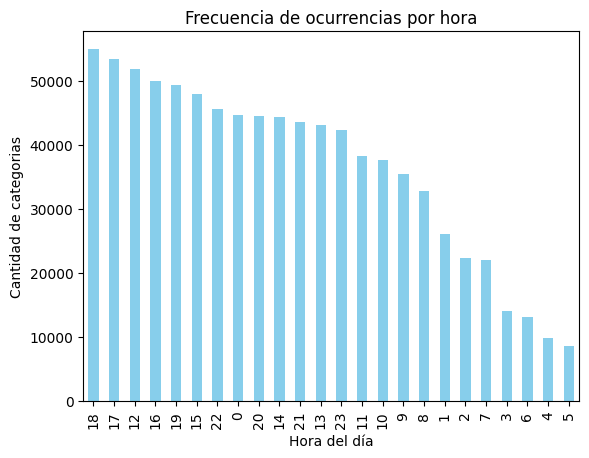

In [14]:
result.plot(kind='bar', color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de categorias')
plt.title('Frecuencia de ocurrencias por hora')
plt.show()

In [15]:
result_night = df['isNight'].apply(lambda x: x).value_counts()
result_night

isNight
False    469787
True     405939
Name: count, dtype: int64

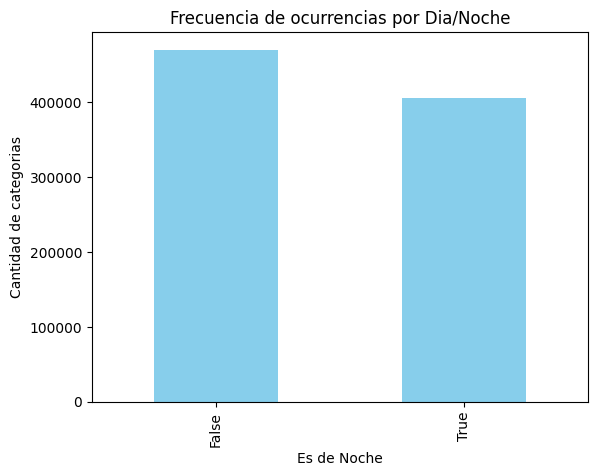

In [16]:
result_night.plot(kind='bar', color='skyblue')
plt.xlabel('Es de Noche')
plt.ylabel('Cantidad de categorias')
plt.title('Frecuencia de ocurrencias por Dia/Noche')
plt.show()

In [17]:
indexes_to_eliminate = df[(df['X'] == -120.5) & (df['Y'] == 90)].index

df.drop(indexes_to_eliminate, inplace=True)
df

,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23:33:00,True,False,0
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23:30:00,True,False,1
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23:30:00,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,00:15:00,True,False,0
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,00:01:00,True,False,1
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,00:01:00,True,False,0
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,00:01:00,True,False,0


In [18]:
df.to_csv('procesed_train_1.csv', index=False, quoting=1)

In [19]:
pivot_table = df.pivot_table(index='PdDistrict', columns='DayOfWeek', values='Category', aggfunc='count', fill_value=0)
pivot_table

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PdDistrict,,,,,,,
BAYVIEW,13623,12600,12389,11918,12364,12773,13422
CENTRAL,13374,11112,14027,12168,11615,11261,11705
INGLESIDE,11857,11266,10826,10335,11277,11531,11626
MISSION,18168,16565,17182,15858,17025,17239,17685
NORTHERN,16304,14278,15455,14248,15058,14539,15211
PARK,7585,6922,6897,6627,7031,6850,7247
RICHMOND,6833,6327,6407,6069,6475,6465,6497
SOUTHERN,24365,21111,23185,20690,22455,21885,22829
TARAVAL,10170,9241,9000,8310,9336,9576,9763


In [20]:
most_common_category = df.groupby('PdDistrict')['Category'].apply(lambda x: x.mode().iloc[0])
most_common_category

PdDistrict
BAYVIEW       OTHER OFFENSES
CENTRAL        LARCENY/THEFT
INGLESIDE     OTHER OFFENSES
MISSION       OTHER OFFENSES
NORTHERN       LARCENY/THEFT
PARK           LARCENY/THEFT
RICHMOND       LARCENY/THEFT
SOUTHERN       LARCENY/THEFT
TARAVAL        LARCENY/THEFT
TENDERLOIN     DRUG/NARCOTIC
Name: Category, dtype: object

In [21]:
most_common_category_per_day = df.groupby(['DayOfWeek', 'Category']).size().reset_index(name='count').sort_values(['DayOfWeek', 'count'], ascending=[True, False]).groupby('DayOfWeek').first().reset_index()

print(most_common_category_per_day)

   DayOfWeek       Category  count
0     Friday  LARCENY/THEFT  27023
1     Monday  LARCENY/THEFT  23503
2   Saturday  LARCENY/THEFT  27118
3     Sunday  LARCENY/THEFT  24052
4   Thursday  LARCENY/THEFT  24339
5    Tuesday  LARCENY/THEFT  23870
6  Wednesday  LARCENY/THEFT  24400


In [22]:
most_common_weekend_crimes = df[df['Weekend']==True]['Category'].value_counts().nlargest(10).reset_index()
most_common_weekend_crimes.columns = ['Category', 'Occurrences']

most_common_weekday_crimes = df[df['Weekend']==False]['Category'].value_counts().nlargest(10).reset_index()
most_common_weekday_crimes.columns = ['Category', 'Occurrences']

most_common_weekend_crimes

,Category,Occurrences
0,LARCENY/THEFT,78193
1,OTHER OFFENSES,51086
2,NON-CRIMINAL,40773
3,ASSAULT,35209
4,VEHICLE THEFT,24198
5,VANDALISM,20949
6,DRUG/NARCOTIC,19938
7,WARRANTS,16554
8,BURGLARY,15238
9,SUSPICIOUS OCC,13082


In [23]:
most_common_weekday_crimes

,Category,Occurrences
0,LARCENY/THEFT,96112
1,OTHER OFFENSES,74857
2,NON-CRIMINAL,51138
3,ASSAULT,41602
4,DRUG/NARCOTIC,33981
5,VEHICLE THEFT,29499
6,WARRANTS,25583
7,VANDALISM,23631
8,BURGLARY,21361
9,SUSPICIOUS OCC,18310


In [24]:
weekend_data = df[df['Weekend'] == True]
weekday_data = df[df['Weekend'] == False]


weekend_most_common_category = weekend_data.groupby('PdDistrict')['Category'].agg(lambda x: x.value_counts().idxmax())
weekday_most_common_category = weekday_data.groupby('PdDistrict')['Category'].agg(lambda x: x.value_counts().idxmax())
weekend_most_common_category

PdDistrict
BAYVIEW       OTHER OFFENSES
CENTRAL        LARCENY/THEFT
INGLESIDE     OTHER OFFENSES
MISSION        LARCENY/THEFT
NORTHERN       LARCENY/THEFT
PARK           LARCENY/THEFT
RICHMOND       LARCENY/THEFT
SOUTHERN       LARCENY/THEFT
TARAVAL        LARCENY/THEFT
TENDERLOIN     DRUG/NARCOTIC
Name: Category, dtype: object

In [25]:
weekday_most_common_category

PdDistrict
BAYVIEW       OTHER OFFENSES
CENTRAL        LARCENY/THEFT
INGLESIDE     OTHER OFFENSES
MISSION       OTHER OFFENSES
NORTHERN       LARCENY/THEFT
PARK           LARCENY/THEFT
RICHMOND       LARCENY/THEFT
SOUTHERN       LARCENY/THEFT
TARAVAL        LARCENY/THEFT
TENDERLOIN     DRUG/NARCOTIC
Name: Category, dtype: object

In [26]:
night_data = df[df['isNight'] == True]
day_data = df[df['isNight'] == False]


night_most_common_category = night_data.groupby('PdDistrict')['Category'].agg(lambda x: x.value_counts().idxmax())
day_most_common_category = day_data.groupby('PdDistrict')['Category'].agg(lambda x: x.value_counts().idxmax())
night_most_common_category

PdDistrict
BAYVIEW       OTHER OFFENSES
CENTRAL        LARCENY/THEFT
INGLESIDE     OTHER OFFENSES
MISSION        LARCENY/THEFT
NORTHERN       LARCENY/THEFT
PARK           LARCENY/THEFT
RICHMOND       LARCENY/THEFT
SOUTHERN       LARCENY/THEFT
TARAVAL        LARCENY/THEFT
TENDERLOIN     DRUG/NARCOTIC
Name: Category, dtype: object

In [27]:
day_most_common_category

PdDistrict
BAYVIEW       OTHER OFFENSES
CENTRAL        LARCENY/THEFT
INGLESIDE     OTHER OFFENSES
MISSION       OTHER OFFENSES
NORTHERN       LARCENY/THEFT
PARK           LARCENY/THEFT
RICHMOND       LARCENY/THEFT
SOUTHERN       LARCENY/THEFT
TARAVAL        LARCENY/THEFT
TENDERLOIN     DRUG/NARCOTIC
Name: Category, dtype: object

In [28]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

daily_occurrences = df['Date'].value_counts().reset_index()
daily_occurrences.columns = ['Date', 'Occurrences']

daily_occurrences = daily_occurrences.sort_values(by='Occurrences', ascending=False)
df.drop('Date', axis=1, inplace=True)

print("Días con mayor ocurrencia:")
print(daily_occurrences.head(10))

Días con mayor ocurrencia:
        Date  Occurrences
0 2011-01-01          650
1 2013-11-01          626
2 2006-01-01          613
3 2004-04-01          562
4 2013-10-04          555
5 2012-10-01          548
6 2012-01-01          526
7 2004-09-01          523
8 2003-04-01          523
9 2003-01-08          523


In [29]:
def most_common_crimes(data, top_n=5):
    return data['Category'].value_counts().nlargest(top_n).reset_index()

christmas_data = df[df['Month'] == 12][df['Day'] == 25]


new_year_data = df[df['Month'] == 1][df['Day'] == 1]


july_4th_data = df[df['Month'] == 7][df['Day'] == 4]

most_common_christmas_crimes = most_common_crimes(christmas_data)

most_common_new_year_crimes = most_common_crimes(new_year_data)

most_common_july_4th_crimes = most_common_crimes(july_4th_data)

print("Cantidad total de crímenes en Navidad:", len(christmas_data))
print("\n5 crímenes más comunes en Navidad:")
print(most_common_christmas_crimes)

print("\nCantidad total de crímenes en Año Nuevo:", len(new_year_data))
print("\n5 crímenes más comunes en Año Nuevo:")
print(most_common_new_year_crimes)

print("\nCantidad total de crímenes en el Cuatro de Julio:", len(july_4th_data))
print("\n5 crímenes más comunes en el Cuatro de Julio:")
print(most_common_july_4th_crimes)


Cantidad total de crímenes en Navidad: 1967

5 crímenes más comunes en Navidad:
         Category  count
0   LARCENY/THEFT    368
1    NON-CRIMINAL    241
2  OTHER OFFENSES    206
3         ASSAULT    201
4   VEHICLE THEFT    153

Cantidad total de crímenes en Año Nuevo: 1789

5 crímenes más comunes en Año Nuevo:
         Category  count
0  OTHER OFFENSES    339
1    NON-CRIMINAL    261
2   LARCENY/THEFT    241
3         ASSAULT    198
4  SUSPICIOUS OCC    122

Cantidad total de crímenes en el Cuatro de Julio: 347

5 crímenes más comunes en el Cuatro de Julio:
         Category  count
0   LARCENY/THEFT     57
1  OTHER OFFENSES     46
2         ASSAULT     42
3    NON-CRIMINAL     34
4  SUSPICIOUS OCC     19


C:\Users\59899\AppData\Local\Temp\ipykernel_7544\734850487.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  christmas_data = df[df['Month'] == 12][df['Day'] == 25]
C:\Users\59899\AppData\Local\Temp\ipykernel_7544\734850487.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_year_data = df[df['Month'] == 1][df['Day'] == 1]
C:\Users\59899\AppData\Local\Temp\ipykernel_7544\734850487.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  july_4th_data = df[df['Month'] == 7][df['Day'] == 4]


In [30]:
christmas_data = df[df['Month'] == 12][df['Day'] == 25]


new_year_data = df[df['Month'] == 1][df['Day'] == 1]


july_4th_data = df[df['Month'] == 7][df['Day'] == 4]


crimes_not_on_specific_dates = df[~((df['Month'] == 12) & (df['Day'] == 25) |
                                   (df['Month'] == 1) & (df['Day'] == 1) |
                                   (df['Month'] == 7) & (df['Day'] == 4))]


print("Cantidad total de crímenes en otras fechas:", len(crimes_not_on_specific_dates))
print(most_common_crimes(crimes_not_on_specific_dates))

C:\Users\59899\AppData\Local\Temp\ipykernel_7544\2620652699.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  christmas_data = df[df['Month'] == 12][df['Day'] == 25]
C:\Users\59899\AppData\Local\Temp\ipykernel_7544\2620652699.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_year_data = df[df['Month'] == 1][df['Day'] == 1]
C:\Users\59899\AppData\Local\Temp\ipykernel_7544\2620652699.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  july_4th_data = df[df['Month'] == 7][df['Day'] == 4]


Cantidad total de crímenes en otras fechas: 871556
         Category   count
0   LARCENY/THEFT  173639
1  OTHER OFFENSES  125352
2    NON-CRIMINAL   91375
3         ASSAULT   76370
4   DRUG/NARCOTIC   53789


In [31]:
count_cat = df['Category'].value_counts()

least_common_categories = count_cat.tail(10)

least_common_categories

Category
EMBEZZLEMENT                 1164
SUICIDE                       508
FAMILY OFFENSES               488
BAD CHECKS                    406
BRIBERY                       289
EXTORTION                     256
SEX OFFENSES NON FORCIBLE     148
GAMBLING                      146
PORNOGRAPHY/OBSCENE MAT        22
TREA                            6
Name: count, dtype: int64

In [32]:
df = df[df['Category'] != 'TREA']
df

,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23:53:00,True,False,0
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23:33:00,True,False,0
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23:30:00,True,False,1
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23:30:00,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,00:15:00,True,False,0
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,00:01:00,True,False,1
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,00:01:00,True,False,0
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,00:01:00,True,False,0


## MODELADO

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [34]:
label_encoder = LabelEncoder()

df.loc[:, 'DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df.loc[:, 'PdDistrict'] = label_encoder.fit_transform(df['PdDistrict'])
df.loc[:, 'Address'] = label_encoder.fit_transform(df['Address'])
df.loc[:, 'Hour'] = label_encoder.fit_transform(df['Hour'])
df.loc[:, 'isNight'] = label_encoder.fit_transform(df['isNight'])
df.loc[:, 'Weekend'] = label_encoder.fit_transform(df['Weekend'])
df.loc[:, 'Block'] = label_encoder.fit_transform(df['Block'])
df


,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,WARRANTS,6,4,19762,-122.425892,37.774599,2015,5,13,1432,1,0,0
1,OTHER OFFENSES,6,4,19762,-122.425892,37.774599,2015,5,13,1432,1,0,0
2,OTHER OFFENSES,6,4,22661,-122.424363,37.800414,2015,5,13,1412,1,0,0
3,LARCENY/THEFT,6,4,4266,-122.426995,37.800873,2015,5,13,1409,1,0,1
4,LARCENY/THEFT,6,5,1843,-122.438738,37.771541,2015,5,13,1409,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,1,8,15800,-122.459033,37.714056,2003,1,6,14,1,0,0
878045,LARCENY/THEFT,1,2,11485,-122.447364,37.731948,2003,1,6,0,1,0,1
878046,LARCENY/THEFT,1,7,11312,-122.403390,37.780266,2003,1,6,0,1,0,0
878047,VANDALISM,1,7,22274,-122.390531,37.780607,2003,1,6,0,1,0,0


In [35]:
df.to_csv("training_procesed_2_encoded.csv", index=False)

In [36]:
X_train = df.drop(labels=['Category'], axis=1) 
y_train = df["Category"] 
X_train.head(5)

,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,isNight,Weekend,Block
0,6,4,19762,-122.425892,37.774599,2015,5,13,1432,1,0,0
1,6,4,19762,-122.425892,37.774599,2015,5,13,1432,1,0,0
2,6,4,22661,-122.424363,37.800414,2015,5,13,1412,1,0,0
3,6,4,4266,-122.426995,37.800873,2015,5,13,1409,1,0,1
4,6,5,1843,-122.438738,37.771541,2015,5,13,1409,1,0,1


In [37]:
y_train

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 875653, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Arbol de decision

In [39]:
dt_clf = DecisionTreeClassifier()


parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": [None, "sqrt", "log2"], "max_depth": [10], "min_samples_leaf":[2]}


grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.26556120846680487


In [40]:
conf_mat = confusion_matrix(y_valid, pred_dt)
conf_mat

array([[   0,   68,    0, ...,   27,    0,    0],
       [   0, 3105,    0, ...,  932,    3,    3],
       [   0,   10,    0, ...,    2,    0,    0],
       ...,
       [   0, 1028,    0, ..., 2082,    0,    0],
       [   0,  919,    0, ...,  332,    4,    0],
       [   0,  379,    0, ...,   95,    0,    1]], dtype=int64)

In [41]:
class_report = classification_report(y_valid, pred_dt)
print(class_report)

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       272
                    ASSAULT       0.16      0.20      0.18     15317
                 BAD CHECKS       0.00      0.00      0.00        90
                    BRIBERY       0.00      0.00      0.00        55
                   BURGLARY       0.21      0.01      0.02      7230
         DISORDERLY CONDUCT       0.23      0.09      0.13       885
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       470
              DRUG/NARCOTIC       0.30      0.38      0.34     10635
                DRUNKENNESS       0.00      0.00      0.00       899
               EMBEZZLEMENT       0.00      0.00      0.00       245
                  EXTORTION       0.00      0.00      0.00        57
            FAMILY OFFENSES       0.00      0.00      0.00       106
     FORGERY/COUNTERFEITING       0.21      0.01      0.02      2067
                      FRAUD      

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RANDOM FOREST

In [42]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [10], "criterion": ["gini", "entropy"], "max_features": [None, "sqrt", "log2"], 
                 "max_depth": [10], "min_samples_split": [5]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.27356664439762235


In [43]:
conf_mat_rf = confusion_matrix(y_valid, pred_rf)
conf_mat_rf

array([[   0,   64,    0, ...,   22,    0,    0],
       [   0, 3231,    0, ...,  718,    9,    0],
       [   0,    8,    0, ...,    2,    0,    0],
       ...,
       [   0, 1171,    0, ..., 1791,    0,    0],
       [   0,  922,    0, ...,  236,    7,    0],
       [   0,  383,    0, ...,   70,    0,    1]], dtype=int64)

In [44]:
class_report_rf = classification_report(y_valid, pred_rf)
print(class_report_rf)

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       272
                    ASSAULT       0.16      0.21      0.18     15317
                 BAD CHECKS       0.00      0.00      0.00        90
                    BRIBERY       0.00      0.00      0.00        55
                   BURGLARY       0.21      0.02      0.03      7230
         DISORDERLY CONDUCT       0.21      0.04      0.06       885
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       470
              DRUG/NARCOTIC       0.30      0.41      0.35     10635
                DRUNKENNESS       0.00      0.00      0.00       899
               EMBEZZLEMENT       0.00      0.00      0.00       245
                  EXTORTION       0.00      0.00      0.00        57
            FAMILY OFFENSES       0.00      0.00      0.00       106
     FORGERY/COUNTERFEITING       0.21      0.00      0.01      2067
                      FRAUD      

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [45]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.18854457520370466


In [46]:
conf_mat_nb = confusion_matrix(y_valid, pred_gnb)
conf_mat_nb

array([[   0,   33,    0, ...,    0,    0,    0],
       [   0, 1336,    0, ...,   38,    0,    0],
       [   0,    6,    0, ...,    0,    0,    0],
       ...,
       [   0,  399,    0, ...,   65,    0,    0],
       [   0,  287,    0, ...,   30,    0,    0],
       [   0,   95,    0, ...,    5,    0,    0]], dtype=int64)

In [47]:
class_report_nb = classification_report(y_valid, pred_gnb)
print(class_report_nb)

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       272
                    ASSAULT       0.15      0.09      0.11     15317
                 BAD CHECKS       0.00      0.00      0.00        90
                    BRIBERY       0.00      0.00      0.00        55
                   BURGLARY       0.07      0.39      0.11      7230
         DISORDERLY CONDUCT       0.00      0.00      0.00       885
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       470
              DRUG/NARCOTIC       0.27      0.03      0.05     10635
                DRUNKENNESS       0.00      0.00      0.00       899
               EMBEZZLEMENT       0.00      0.00      0.00       245
                  EXTORTION       0.00      0.00      0.00        57
            FAMILY OFFENSES       0.00      0.00      0.00       106
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2067
                      FRAUD      

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ADA BOOST

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

parameters_ada = {"n_estimators": [10]}

grid_ada = GridSearchCV(ada_clf, parameters_ada, scoring=make_scorer(accuracy_score))
grid_ada.fit(X_training, y_training)

ada_clf = grid_ada.best_estimator_

ada_clf.fit(X_training, y_training)
pred_ada = ada_clf.predict(X_valid)
acc_ada = accuracy_score(y_valid, pred_ada)

print("The Score for AdaBoost is: " + str(acc_ada))

The Score for AdaBoost is: 0.23210625189144127


In [49]:
conf_mat_ada = confusion_matrix(y_valid, pred_ada)
conf_mat_ada

array([[   0,   52,    0, ...,   18,    0,    0],
       [   0,  952,    0, ...,  749,    0,    0],
       [   0,    3,    0, ...,    1,    0,    0],
       ...,
       [   0,  490,    0, ..., 1396,    0,    0],
       [   0,  225,    0, ...,  311,    0,    0],
       [   0,   91,    0, ...,   98,    0,    0]], dtype=int64)

In [50]:
class_report_ada = classification_report(y_valid, pred_gnb)
print(class_report_ada)

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       272
                    ASSAULT       0.15      0.09      0.11     15317
                 BAD CHECKS       0.00      0.00      0.00        90
                    BRIBERY       0.00      0.00      0.00        55
                   BURGLARY       0.07      0.39      0.11      7230
         DISORDERLY CONDUCT       0.00      0.00      0.00       885
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       470
              DRUG/NARCOTIC       0.27      0.03      0.05     10635
                DRUNKENNESS       0.00      0.00      0.00       899
               EMBEZZLEMENT       0.00      0.00      0.00       245
                  EXTORTION       0.00      0.00      0.00        57
            FAMILY OFFENSES       0.00      0.00      0.00       106
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2067
                      FRAUD      

C:\Users\59899\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### FEATURE SELECTION

## EVALUACION